In [88]:
from __future__ import print_function
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy import stats
import pylab as pl
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA



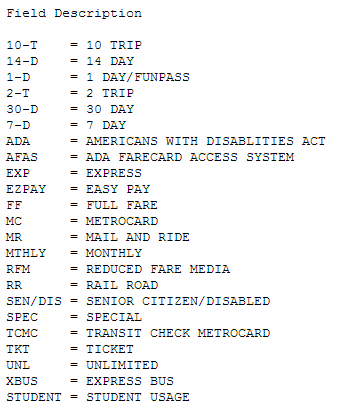

In [5]:
from IPython.display import Image
Image(filename = "Ridetypes.png")

In [6]:
mtafare = np.load('MTA_Fare.npy')

In [7]:
mtafare.shape

(600, 23, 194)

DATE: from 05/21/2010 to 02/21/2014

In [8]:
date = pd.date_range(start = '05/21/2010', periods = 194, freq='W-FRI')
date

DatetimeIndex(['2010-05-21', '2010-05-28', '2010-06-04', '2010-06-11',
               '2010-06-18', '2010-06-25', '2010-07-02', '2010-07-09',
               '2010-07-16', '2010-07-23',
               ...
               '2013-11-29', '2013-12-06', '2013-12-13', '2013-12-20',
               '2013-12-27', '2014-01-03', '2014-01-10', '2014-01-17',
               '2014-01-24', '2014-01-31'],
              dtype='datetime64[ns]', length=194, freq='W-FRI')

### Task 1:
### Event detection: Identify the most prominent event. There is a very significant drop (>3-sigma) in all time series.
### Identify it, figure out the date (you know when the data starts and what the cadence is) and figure out what it is due to.

In [9]:
mtafare

array([[[56961, 64703, 68002, ..., 36527, 33929, 36824],
        [ 1732,  2083,  2107, ...,  1264,  1172,  1238],
        [  203,   276,   245, ...,   186,   167,   167],
        ..., 
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0],
        [   -1,    -1,    -1, ...,  1121,  1377,   712]],

       [[16210, 20179, 21769, ...,    -1,    -1,    -1],
        [  503,   647,   665, ...,    -1,    -1,    -1],
        [   41,    43,    44, ...,    -1,    -1,    -1],
        ..., 
        [    0,     0,     0, ...,    -1,    -1,    -1],
        [    0,     0,     0, ...,    -1,    -1,    -1],
        [   -1,    -1,    -1, ...,    -1,    -1,    -1]],

       [[ 3292,  3429,  3629, ...,  3746,  3406,  3217],
        [  110,    92,   102, ...,   212,   209,   211],
        [    7,     6,    13, ...,    26,    20,    22],
        ..., 
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0, 

In [10]:
# -1?? 
mtafare = mtafare.astype('float')
mtafare[mtafare == -1] = np.NAN

In [11]:
mtafare

array([[[  5.69610000e+04,   6.47030000e+04,   6.80020000e+04, ...,
           3.65270000e+04,   3.39290000e+04,   3.68240000e+04],
        [  1.73200000e+03,   2.08300000e+03,   2.10700000e+03, ...,
           1.26400000e+03,   1.17200000e+03,   1.23800000e+03],
        [  2.03000000e+02,   2.76000000e+02,   2.45000000e+02, ...,
           1.86000000e+02,   1.67000000e+02,   1.67000000e+02],
        ..., 
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [             nan,              nan,              nan, ...,
           1.12100000e+03,   1.37700000e+03,   7.12000000e+02]],

       [[  1.62100000e+04,   2.01790000e+04,   2.17690000e+04, ...,
                      nan,              nan,              nan],
        [  5.03000000e+02,   6.47000000e+02,   6.65000000e+0

In [71]:
#np.nansum?
mtarides_station = np.nansum(mtafare, axis=1, dtype=None, out=None, keepdims=False)

In [72]:
mtarides_station.shape

(600, 194)

In [74]:
mta_rides_station = pd.DataFrame(mtarides_station.T)
mta_rides_station

0        1       2        3        4        5        6        7    \
0    126878.0  37306.0  6606.0  16378.0  18564.0  19987.0  12449.0  11091.0   
1    149477.0  46464.0  6881.0  17408.0  19903.0  20625.0  13644.0  11659.0   
2    152383.0  49359.0  7229.0  17595.0  19948.0  21225.0  13719.0  12037.0   
3    160175.0  44849.0  5731.0  14242.0  16076.0  17412.0  11460.0   9809.0   
4    162641.0  41509.0  7032.0  17589.0  20283.0  20909.0  14094.0  11944.0   
5    156414.0  35654.0  5107.0  13168.0  14601.0  15589.0  10295.0   8586.0   
6    159156.0  41989.0  5497.0  14510.0  16151.0  17187.0  11504.0   9774.0   
7    159374.0  41909.0  5668.0  14388.0  16066.0  16897.0  11519.0   9651.0   
8    163285.0  41214.0  5555.0  14221.0  16205.0  16952.0  11449.0   9821.0   
9    159252.0  41142.0  6942.0  17180.0  19619.0  20563.0  13546.0  11568.0   
10   161573.0  41006.0  7015.0  17337.0  19375.0  20309.0  13645.0  11461.0   
11   157472.0  39797.0  6856.0  17312.0  19222.0  20393.0  13309.0  11790.0   
12   140267.0  38546.0  6682.0  16835.0  18824.0  19876.0  13110.0  11240.0   
13   146508.0  37887.0  6920.0  17317.0  19743.0  21479.0  13604.0  11899.0   
14   134336.0  31134.0  6621.0  16483.0  18260.0  20023.0  12669.0  11355.0   
15   140549.0  41527.0  7741.0  18403.0  20073.0  22873.0  14347.0  13216.0   
16   132170.0  41213.0  7571.0  18336.0  20283.0  22963.0  14295.0  12798.0   
17   126177.0  40023.0  7232.0  17584.0  19605.0  22112.0  13736.0  11962.0   
18   128274.0  41197.0  7487.0  17895.0  20464.0  22915.0  14225.0  12718.0   
19   131653.0  38121.0  7246.0  17185.0  19909.0  22252.0  13773.0  12128.0   
20   125115.0  41053.0  7402.0  17947.0  20415.0  22772.0  14186.0  12707.0   
21   128307.0  40791.0  7542.0  18241.0  20463.0  22602.0  14213.0  12781.0   
22   120711.0  39481.0  7088.0  17575.0  20462.0  22081.0  13946.0  12480.0   
23   123919.0  38548.0  7226.0  17523.0  20354.0  22061.0  13952.0  12641.0   
24   127016.0  41023.0  7584.0  17839.0  20696.0  22779.0  14170.0  12897.0   
25   109412.0  27753.0  6413.0  15666.0  17751.0  19372.0  12102.0  10895.0   
26   130172.0  39584.0  7142.0  17421.0  19784.0  21675.0  13897.0  12129.0   
27   130818.0  39635.0  7219.0  17511.0  19996.0  21817.0  13817.0  12488.0   
28   126172.0  38445.0  7276.0  17650.0  19715.0  21373.0  13585.0  12084.0   
29   115889.0  30522.0  6736.0  16678.0  18673.0  20568.0  12784.0  11562.0   
..        ...      ...     ...      ...      ...      ...      ...      ...   
164  133877.0      0.0  7531.0  19956.0  21319.0  23364.0  14139.0  13001.0   
165  106029.0      0.0  7426.0  19965.0  21264.0  23215.0  14238.0  12836.0   
166  109520.0      0.0  7246.0  19819.0  20992.0  22705.0  14170.0  12335.0   
167  101694.0      0.0  6881.0  18277.0  20202.0  22830.0  13691.0  11785.0   
168   97289.0      0.0  6943.0  18984.0  20482.0  23084.0  13858.0  12175.0   
169   85385.0      0.0  6661.0  18020.0  19429.0  21430.0  12938.0  11621.0   
170   91152.0      0.0  8801.0  23948.0  23653.0  26527.0  15916.0  15924.0   
171   78611.0      0.0  8924.0  24399.0  23955.0  26882.0  15999.0  16156.0   
172   93906.0      0.0  8725.0  24662.0  24209.0  27480.0  16192.0  16297.0   
173   72400.0      0.0  8872.0  24733.0  24332.0  27622.0  16446.0  16418.0   
174   86888.0      0.0  8771.0  24525.0  24004.0  27645.0  16143.0  16309.0   
175   94569.0      0.0  8565.0  23167.0  23054.0  26156.0  15269.0  15234.0   
176   91569.0      0.0  8795.0  24596.0  24241.0  27599.0  16249.0  16621.0   
177   92180.0      0.0  8892.0  24165.0  24081.0  26832.0  16029.0  16342.0   
178   89959.0      0.0  8739.0  23504.0  23681.0  26403.0  15954.0  15556.0   
179   85529.0      0.0  8309.0  22747.0  23053.0  25753.0  15490.0  14932.0   
180   85204.0      0.0  8590.0  24214.0  23641.0  26594.0  16147.0  15611.0   
181   77550.0      0.0  6959.0  19451.0  19307.0  21625.0  13072.0  12160.0   
182   86791.0      0.0  8522.0  23751.0  23447.0  26192.0  1

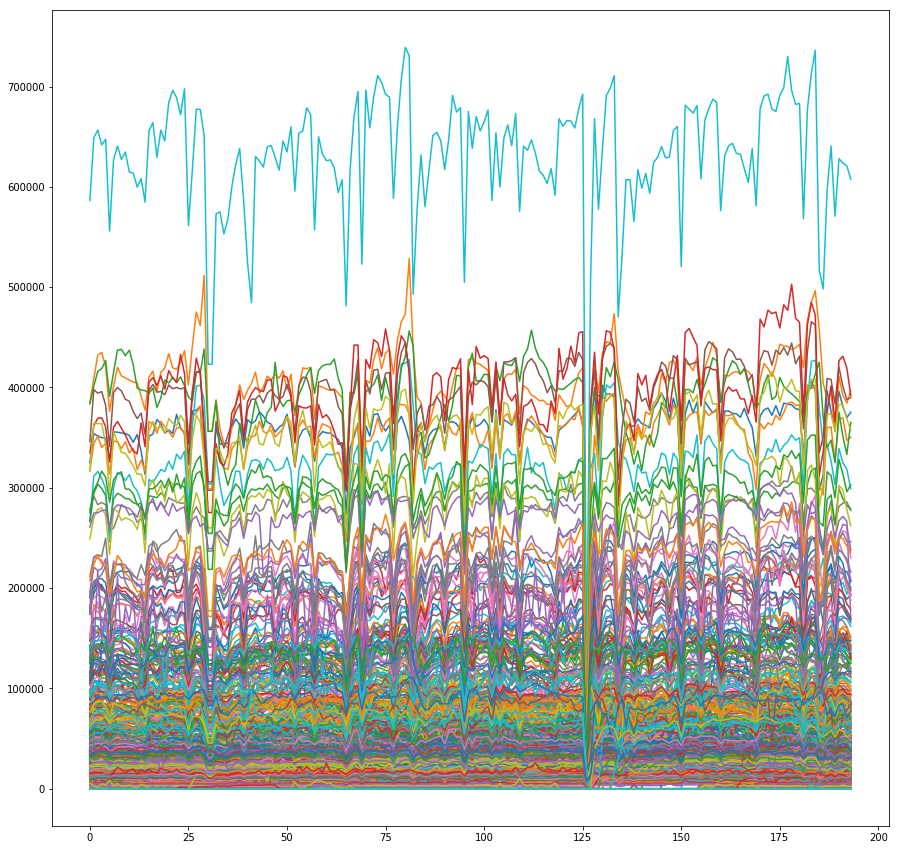

In [75]:
# just plotting to get an idea
plt.figure(figsize = (15,15))
pl.plot(mta_rides)
plt.show()

In [76]:
mta_ride1 = np.nansum(mta_rides, axis=1,dtype=None, out=None, keepdims=False)
mta_ride1.shape

(194,)

In [77]:
mta_ride1 = pd.DataFrame(mta_ride1)
mta_ride1

0
0    26720267.0
1    29265971.0
2    29601189.0
3    29387592.0
4    29185768.0
5    26211666.0
6    28683614.0
7    29125646.0
8    28803814.0
9    28599546.0
10   28312019.0
11   27931015.0
12   27271701.0
13   28250357.0
14   26687174.0
15   30018756.0
16   30183790.0
17   29052100.0
18   30068614.0
19   29172431.0
20   30327068.0
21   30190292.0
22   29987273.0
23   30053446.0
24   30128994.0
25   25164391.0
26   29189219.0
27   30580790.0
28   30106591.0
29   27561217.0
..          ...
164  31060069.0
165  30672288.0
166  30477105.0
167  29658260.0
168  29941845.0
169  27830794.0
170  33157649.0
171  33538567.0
172  33827121.0
173  33481314.0
174  33486842.0
175  32752123.0
176  34071477.0
177  33845862.0
178  33947696.0
179  33020492.0
180  33485463.0
181  27372991.0
182  33173670.0
183  34058171.0
184  33808622.0
185  24806944.0
186  24851491.0
187  30328635.0
188  31366089.0
189  28575616.0
190  31715761.0
191  31818560.0
192  30954425.0
193  29535321.0

[194 rows x 1 columns]

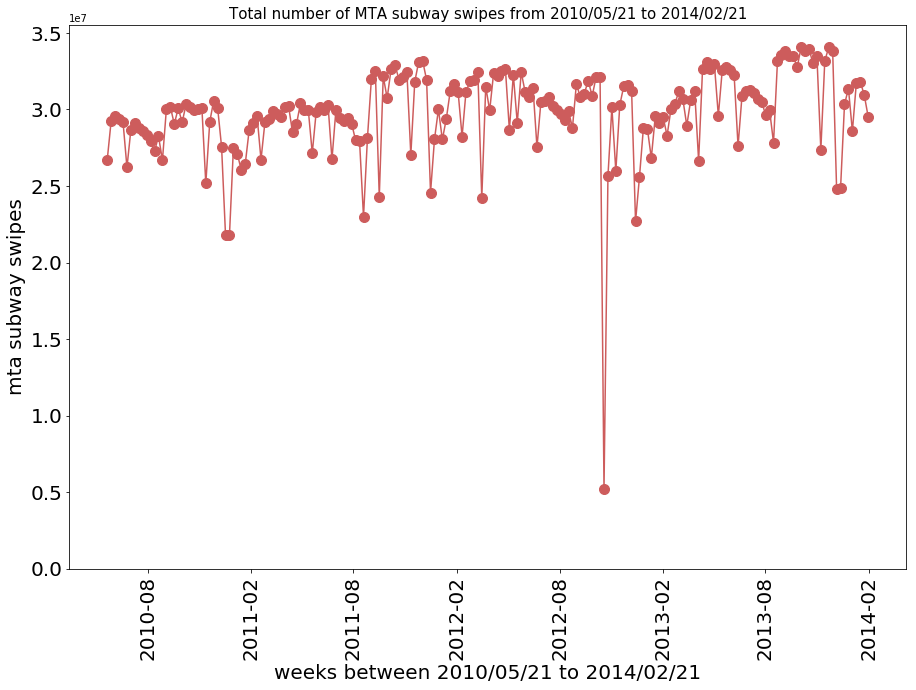

In [110]:
fig = pl.figure(figsize = (15,10))
pl.plot(date,mta_ride1, '.-', ms=20, color="IndianRed")
pl.xticks(rotation=90, fontsize=20)

pl.yticks(fontsize=20)
pl.ylim(-20, pl.ylim()[1])
pl.legend(fontsize=20)
pl.ylabel("mta subway swipes", fontsize=20)
pl.xlabel("weeks between 2010/05/21 to 2014/02/21", fontsize=20)
pl.title('Total number of MTA subway swipes from 2010/05/21 to 2014/02/21', size = 15)
pl.show()

## Fig.1: Total number of MTA subway swipes from 2010/05/21 to 2014/02/21
from figure 1 we can see that there is a drop beween week 2012-08 and 2013-02, but is it exceeding the threshold? we need further approve by adding threshold to the graph.

In [79]:
mta_mean1 = np.nanmean(mta_ride1)
mta_mean1

29781349.87113402

In [80]:
mta_std1 = np.nanstd(mta_ride1)
mta_std1

2983960.421700886

In [81]:
print ("mean swipes{:.3f}".format(mta_mean1))
print ("stdev swipes {:.3f}".format(mta_std1))
thresholds = [mta_mean1 + 3 * mta_std1, 
              mta_mean1 - 3 * mta_std1]
print ("3-sigma thresholds {:.3f} {:.3f}".format(*thresholds))

mean swipes29781349.871
stdev swipes 2983960.422
3-sigma thresholds 38733231.136 20829468.606


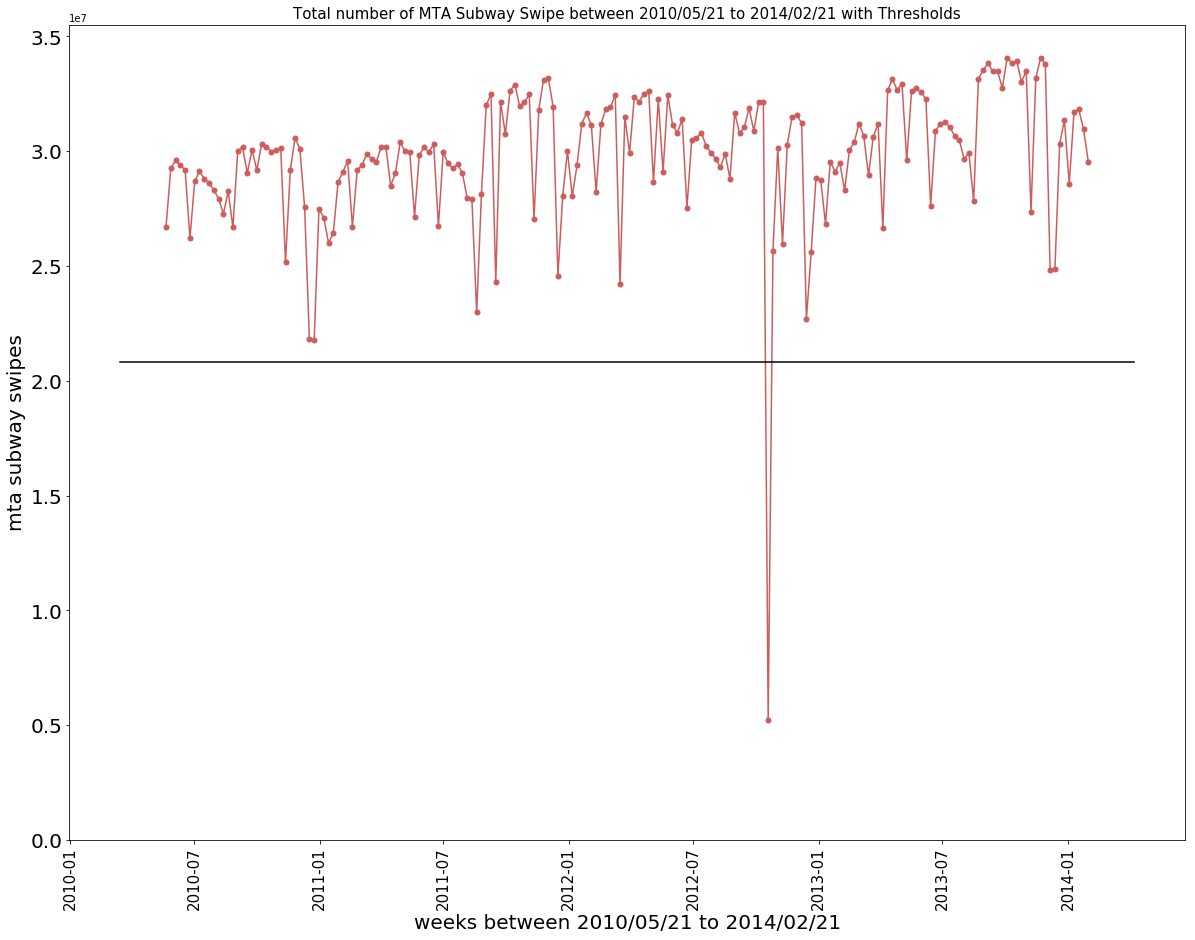

In [112]:
fig = pl.figure(figsize=(20,15))
ax = fig.add_subplot(111)

ax.plot(date, mta_ride1, '.-', ms=10, color="IndianRed")
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds[1], thresholds[1]], color='k')
pl.xticks(rotation=90, fontsize=15)
pl.yticks(fontsize=20)
pl.ylim(-20, pl.ylim()[1])
pl.legend(fontsize=20)
pl.ylabel("mta subway swipes", fontsize=20)
pl.xlabel("weeks between 2010/05/21 to 2014/02/21", fontsize=20);
pl.title('Total number of MTA Subway Swipe between 2010/05/21 to 2014/02/21 with Thresholds',size = 15)
pl.show()

### Fig 2.: Total number of MTA Subway Swipe between 2010/05/21 to 2014/02/21 with Thresholds
From graph it is centain that between 2012-07 to 2013-01 there is an event that caused the swipe drop

In [56]:
event = np.where(mta_ride1 < thresholds[1])
event

(array([126]), array([0]))

In [58]:
date[126]

Timestamp('2012-10-19 00:00:00', offset='W-FRI')

https://en.wikipedia.org/wiki/Hurricane_Sandy
http://www.cnn.com/2013/07/13/world/americas/hurricane-sandy-fast-facts/index.html
From the internet, it seems that it was Hurrican Sandy that caused the incident. 

### Task 2:
### Some of the time series are stationary, some have a complex structure, some show a downward trend: Identify the ridership types that have steadily increased in popularity, and that have steadily decreased. by how much? (e.g what is the ratio of usage in the first 10 and last 10 weeks)

In [24]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

In [66]:
cardrides = np.nansum(mtafare, axis=0, dtype=None, out=None, keepdims=False)
cardrides.shape

(23, 194)

In [35]:
cardrides.shape

(23, 194)

In [68]:
card_rides = pd.DataFrame(cardrides.T)
card_rides.set_index(date, inplace = True)
card_rides.columns = ridetype
card_rides

10t       14d       1d        2t      30d         7d  \
2010-05-21  11494615.0  530524.0  47801.0  186551.0  46808.0  3697443.0   
2010-05-28  12526859.0  583533.0  51486.0  199229.0  64353.0  3981808.0   
2010-06-04  12766627.0  586194.0  51636.0  199668.0  56994.0  4033030.0   
2010-06-11  12653675.0  562602.0  52063.0  196389.0  37429.0  4032753.0   
2010-06-18  12809694.0  548858.0  51153.0  194883.0  35210.0  3925446.0   
2010-06-25  11429783.0  455691.0  46852.0  175648.0  46849.0  3663144.0   
2010-07-02  12346877.0  518187.0  48963.0  188467.0  60225.0  3918104.0   
2010-07-09  12576759.0  513412.0  49629.0  188090.0  47439.0  4028251.0   
2010-07-16  12437115.0  512192.0  49030.0  186822.0  32084.0  4030717.0   
2010-07-23  12431257.0  522569.0  50376.0  190528.0  52171.0  4032340.0   
2010-07-30  12401572.0  518622.0  48958.0  188840.0  54660.0  4063667.0   
2010-08-06  12280641.0  519691.0  48619.0  187663.0  44183.0  4015534.0   
2010-08-13  11913505.0  496049.0  47465.0  182039.0  29340.0  3957270.0   
2010-08-20  12391812.0  513987.0  50013.0  185601.0  37160.0  3997382.0   
2010-08-27  11878127.0  500940.0  47675.0  179293.0  45464.0  3716943.0   
2010-09-03  12918455.0  578854.0  51176.0  197971.0  61920.0  4116973.0   
2010-09-10  12812272.0  590931.0  51707.0  200593.0  45491.0  4174242.0   
2010-09-17  12292468.0  541989.0  49344.0  189592.0  36554.0  3954011.0   
2010-09-24  12662413.0  608230.0  52702.0  205199.0  63071.0  4064042.0   
2010-10-01  12400611.0  575635.0  49929.0  197285.0  59699.0  3947496.0   
2010-10-08  12721967.0  598850.0  51861.0  202933.0  50235.0  4154100.0   
2010-10-15  12633600.0  594344.0  50945.0  202221.0  33666.0  4151499.0   
2010-10-22  12648413.0  593408.0  51321.0  202022.0  60117.0  4048087.0   
2010-10-29  12699903.0  615322.0  51993.0  202611.0  61981.0  4007502.0   
2010-11-05  12767910.0  626051.0  52094.0  205518.0  55200.0  4010508.0   
2010-11-12  11074280.0  493810.0  44479.0  176420.0  24627.0  3473064.0   
2010-11-19  12651006.0  596919.0  50745.0  199127.0  47185.0  3812625.0   
2010-11-26  13210412.0  629121.0  51972.0  204945.0  64080.0  4119030.0   
2010-12-03  13306773.0  606671.0  50345.0  196107.0  59255.0  4125508.0   
2010-12-10  12600160.0  551093.0  48429.0  188623.0  30367.0  3872145.0   
...                ...       ...      ...       ...      ...        ...   
2013-07-12  13635157.0  689994.0  58094.0  187054.0  45927.0  5866520.0   
2013-07-19  13485019.0  686705.0  60128.0  188823.0  56981.0  5945813.0   
2013-07-26  13649267.0  691105.0  58146.0  189038.0  53423.0  5966736.0   
2013-08-02  13233130.0  675279.0  58245.0  187292.0  42113.0  5864963.0   
2013-08-09  13382775.0  676254.0  58066.0  187404.0  35728.0  5865129.0   
2013-08-16  12477834.0  639655.0  56320.0  176015.0  45463.0  5322521.0   
2013-08-23  13913373.0  753222.0  60480.0  198868.0  64786.0  6074971.0   
2013-08-30  13651157.0  763619.0  62470.0  202085.0  57804.0  6229329.0   
2013-09-06  13773146.0  773510.0  61994.0  201775.0  46068.0  6219136.0   
2013-09-13  13445117.0  785884.0  64678.0  203151.0  57841.0  6103608.0   
2013-09-20  13439745.0  767620.0  64506.0  202091.0  65573.0  6129867.0   
2013-09-27  13372173.0  762925.0  62803.0  198412.0  54819.0  6047366.0   
2013-10-04  13637610.0  785163.0  63636.0  205711.0  49184.0  6263875.0   
2013-10-11  13548111.0  771250.0  63003.0  203160.0  46893.0  6237441.0   
2013-10-18  13761191.0  804458.0  66519.0  206175.0  65481.0  6107842.0   
2013-10-25  13360751.0  777877.0  62685.0  200040.0  63239.0  5929342.0   
2013-11-01  13422367.0  795525.0  63711.0  203081.0  54939.0  6029517.0   
2013-11-08  11569460.0  610528.0  52416.0  170706.0  30535.0  5146488.0   
2013-11-15  13736112.0  803871.0  65193.0  200552.0  64277.0  6074119.0   
2013-11-22  14244936.0  790419.0  64417.0  197882.0  67490.0  6461735.0   
2013-11-29  14604028.0  781529.0  62658.0  193268.0  56671.0  6388538.0   
2013-12-06  11344945.0  596341.0  50820.0  1

In [83]:
#pd.rolling_mean?
cardrides_rmean = card_rides.rolling(center=False, axis=0, window=10).mean()
cardrides_rstd = card_rides.rolling(center=False, axis=0, window=10).std()

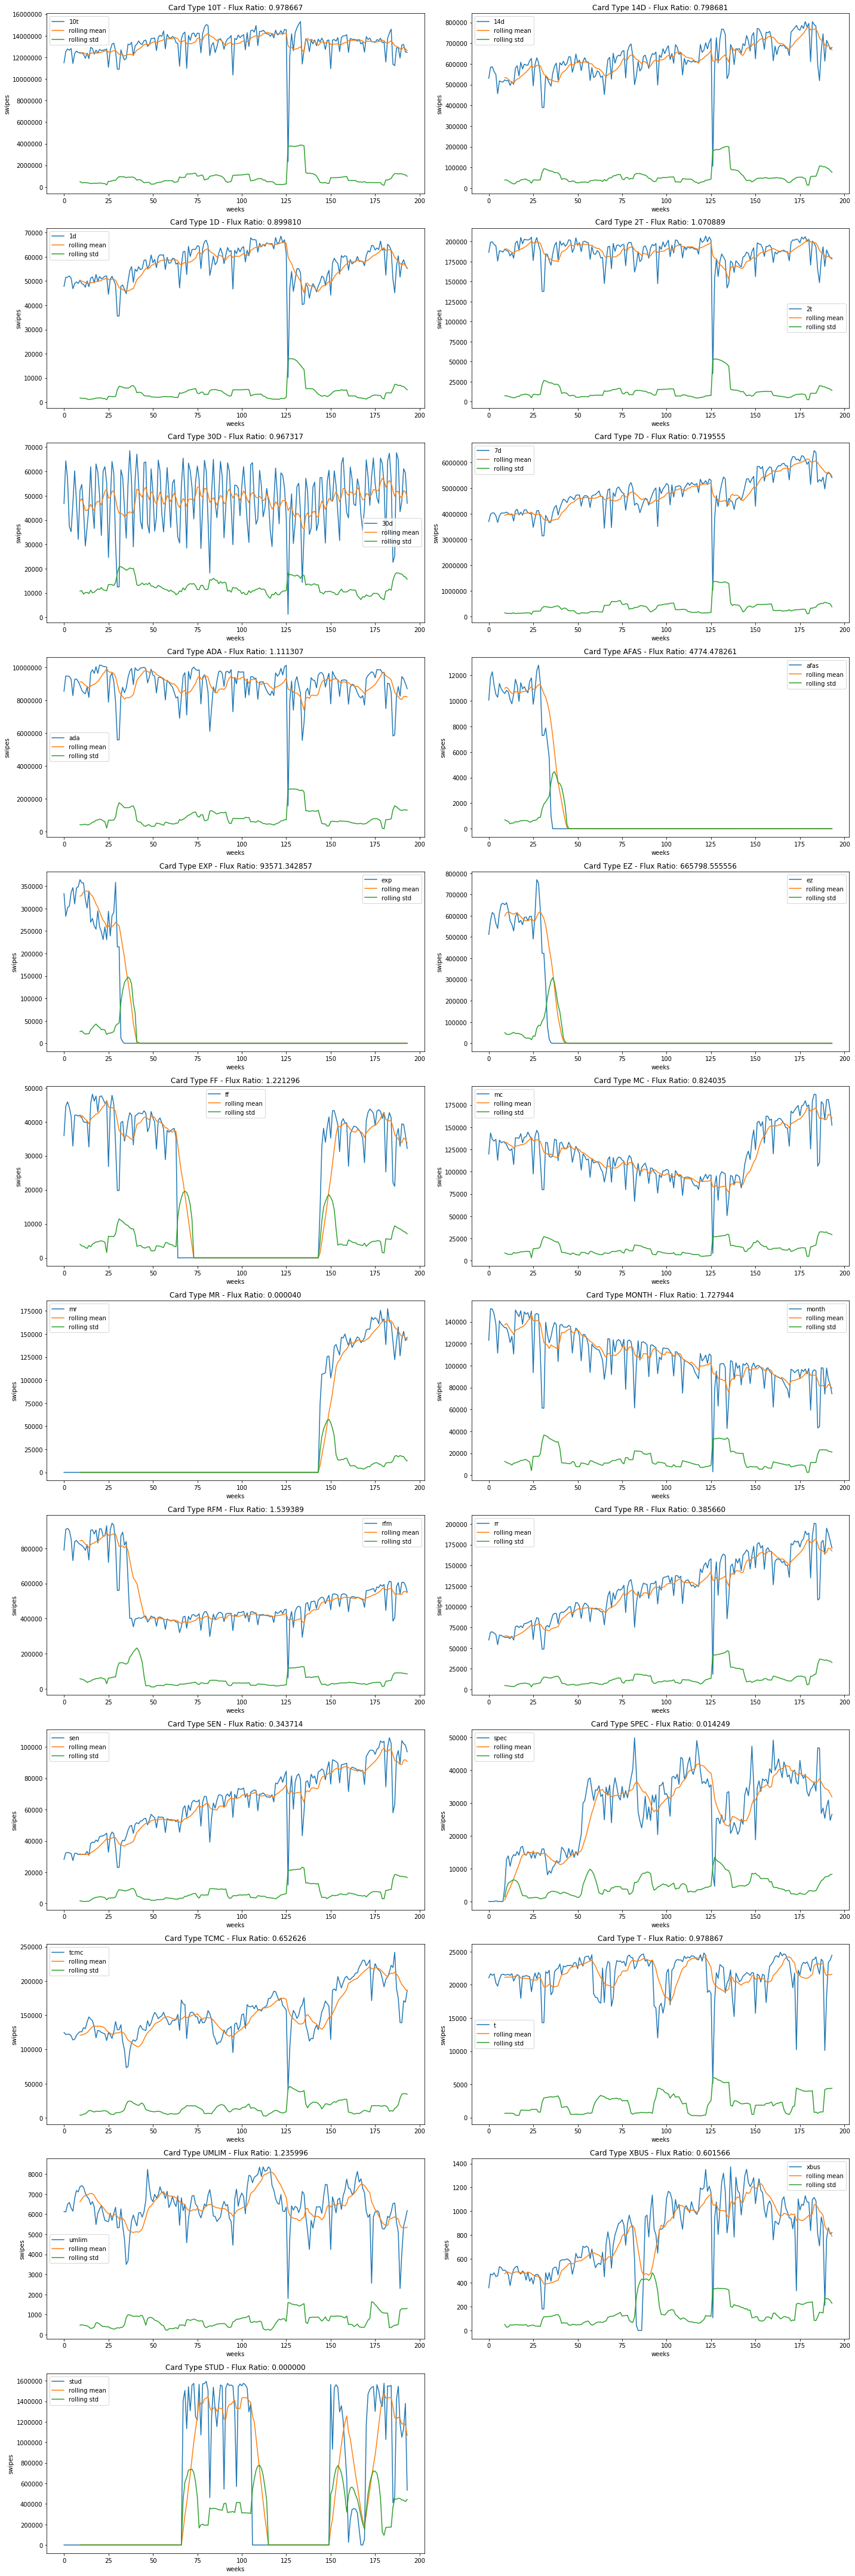

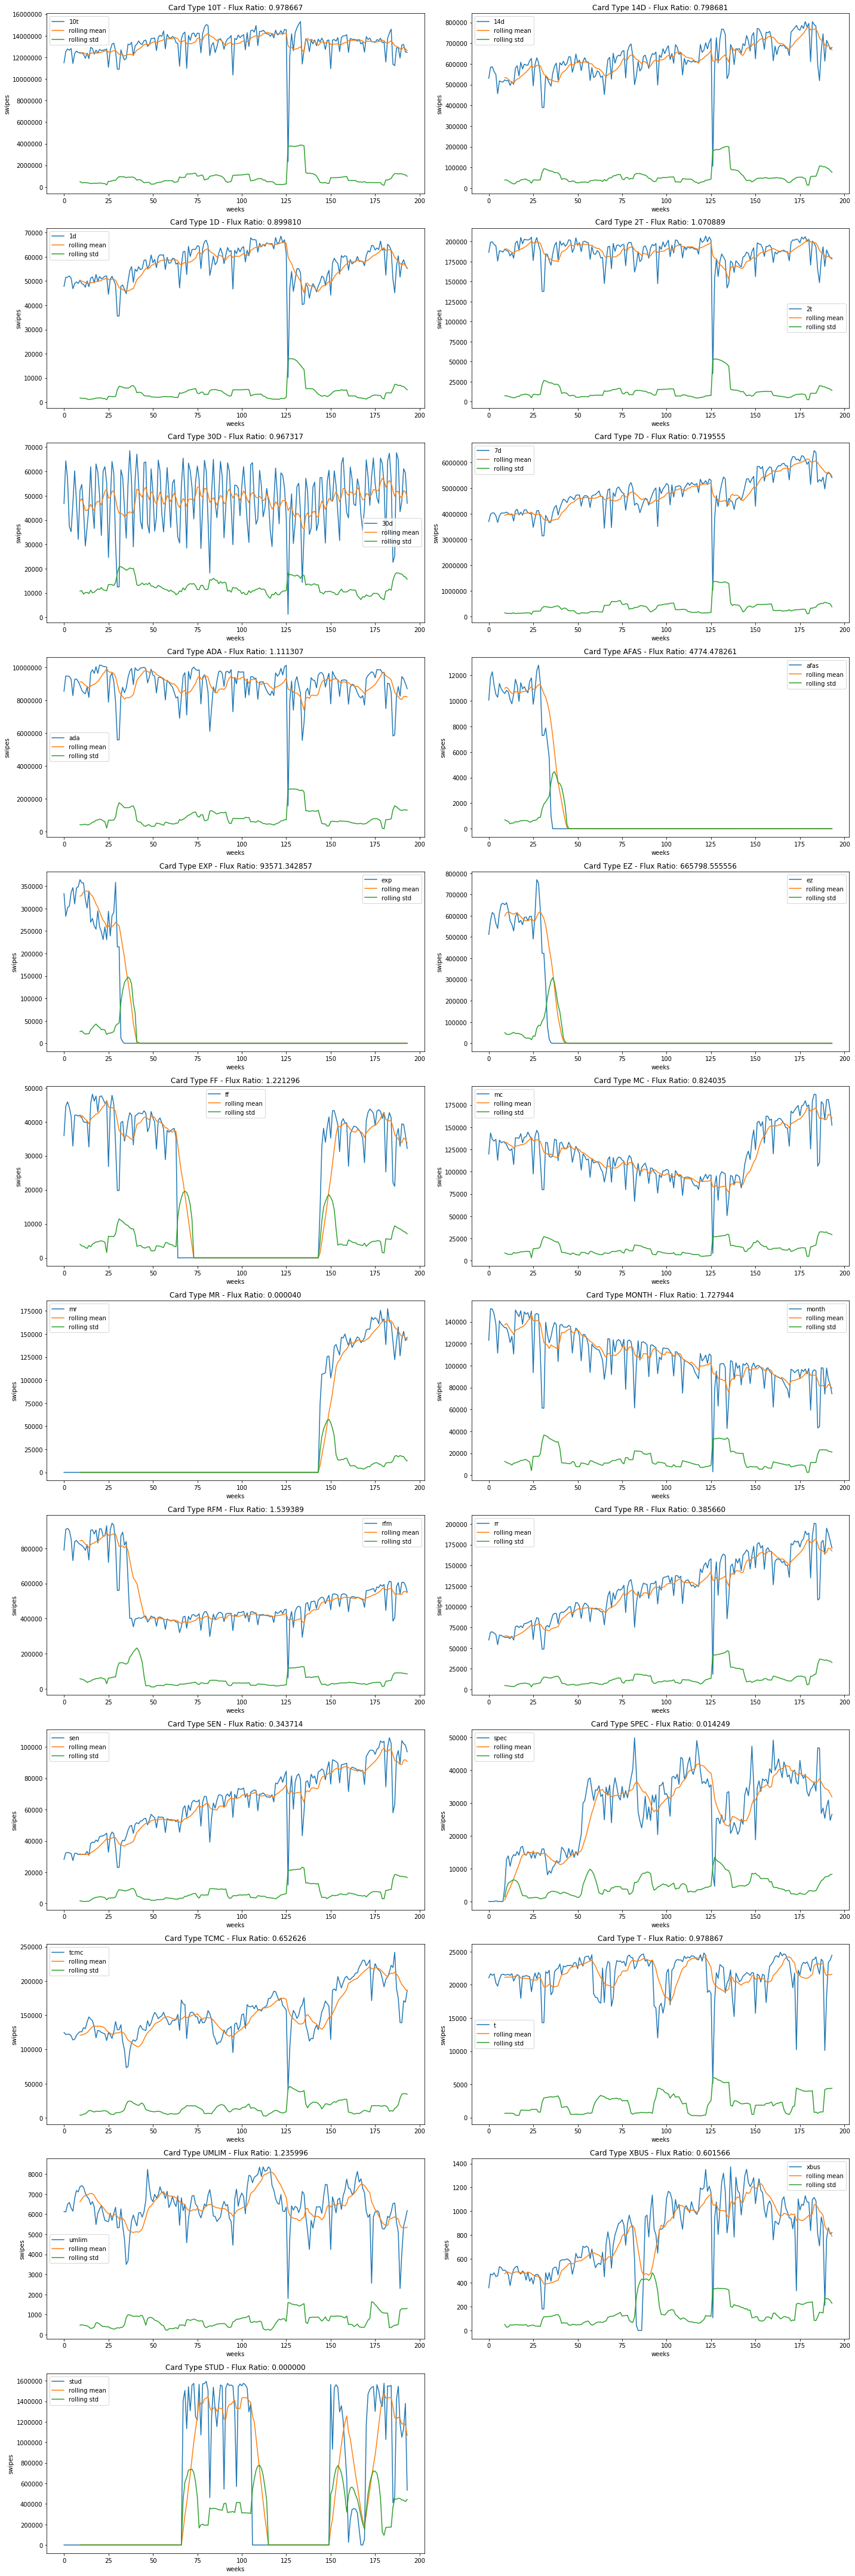

In [85]:
columns = card_rides.columns
fig = pl.figure(figsize=(20,60))
ratio = dict()

for i in range(len(columns)):
    cr = card_rides.iloc[:,i]
    cr_rmean = cardrides_rmean.iloc[:,i]
    cr_rstd = cardrides_rstd.iloc[:,i]
    
    cr_ratio = cr.iloc[0:10].mean() / cr.iloc[-10:].mean()
    ratio[cr.name.upper()] = cr_ratio
    
    ax = fig.add_subplot(12,2,i+1)
    ax.plot(np.arange(len(cr)), cr, label=columns[i])
    ax.plot(np.arange(len(cr)), cr_rmean, label="rolling mean")
    ax.plot(np.arange(len(cr)), cr_rstd, label="rolling std")
    ax.get_xaxis().get_major_formatter().set_scientific(False)
    ax.get_yaxis().get_major_formatter().set_scientific(False)
    ax.set_xlabel('weeks')
    ax.set_ylabel('swipes')
    ax.set_title('Card Type {} - Flux Ratio: {:.6f}'.format(cr.name.upper(), cr_ratio))
    pl.legend(fontsize=10)

pl.tight_layout()
pl.show()

## Fig 3. MTA subway swipes per ridership 
most of riderships has a drop around week 125. EZ, FF, and MC drop to 0 after week30 (around), and RFM shows an opposite tendency which is an increase around week 140

## Augmented Dickey-Fuller unit root test.

In [86]:
def test_stationarity(timeseries):
    adftest = sm.tsa.adfuller(timeseries)
    
    if (adftest[0] > adftest[4]['5%']):
        print("{} \t | The series is not stationary".format(timeseries.name))
    else:
        print("{} \t | The series is stationary".format(timeseries.name))

In [89]:
for i in range(len(columns)):
    test_stationarity(card_rides.iloc[:,i])

10t 	 | The series is stationary
14d 	 | The series is not stationary
1d 	 | The series is not stationary
2t 	 | The series is stationary
30d 	 | The series is stationary
7d 	 | The series is not stationary
ada 	 | The series is stationary
afas 	 | The series is not stationary
exp 	 | The series is stationary
ez 	 | The series is not stationary
ff 	 | The series is not stationary
mc 	 | The series is not stationary
mr 	 | The series is not stationary
month 	 | The series is not stationary
rfm 	 | The series is not stationary
rr 	 | The series is not stationary
sen 	 | The series is not stationary
spec 	 | The series is not stationary
tcmc 	 | The series is stationary
t 	 | The series is stationary
umlim 	 | The series is stationary
xbus 	 | The series is not stationary
stud 	 | The series is not stationary


In [90]:
for k, v in sorted(ratio.items(), key=lambda kv: (-kv[1], kv[0])):
    print("{} \t | {:.6f}".format(k, v))

EZ 	 | 665798.555556
EXP 	 | 93571.342857
AFAS 	 | 4774.478261
MONTH 	 | 1.727944
RFM 	 | 1.539389
UMLIM 	 | 1.235996
FF 	 | 1.221296
ADA 	 | 1.111307
2T 	 | 1.070889
T 	 | 0.978867
10T 	 | 0.978667
30D 	 | 0.967317
1D 	 | 0.899810
MC 	 | 0.824035
14D 	 | 0.798681
7D 	 | 0.719555
TCMC 	 | 0.652626
XBUS 	 | 0.601566
RR 	 | 0.385660
SEN 	 | 0.343714
SPEC 	 | 0.014249
MR 	 | 0.000040
STUD 	 | 0.000000


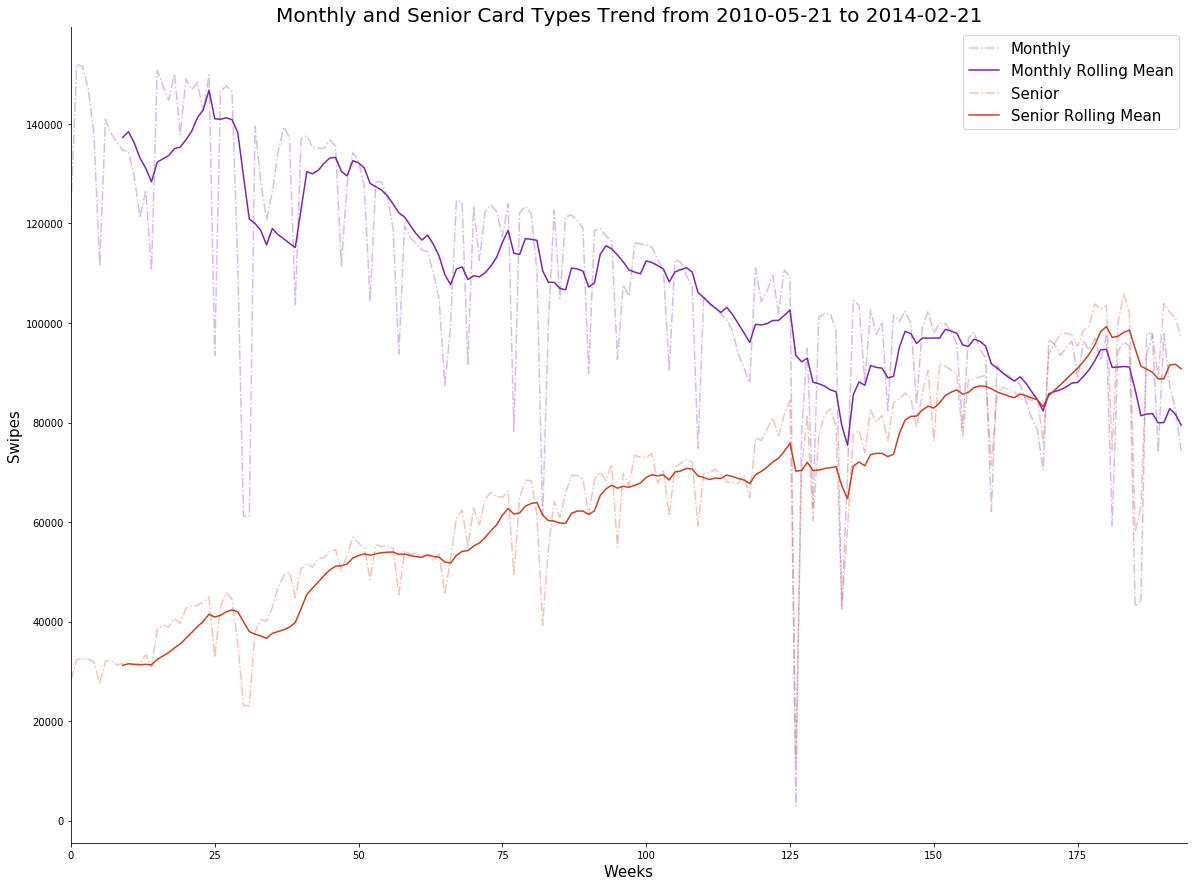

In [94]:
fig = pl.figure(figsize=(20,15))
ax = fig.add_subplot(111)

ax.plot(np.arange(len(card_rides['month'])), card_rides['month'], label="Monthly", c='#7B24AD', linestyle='-.',alpha=0.3)
ax.plot(np.arange(len(card_rides['month'])), cardrides_rmean['month'], label="Monthly Rolling Mean", c='#7B24AD')
ax.plot(np.arange(len(card_rides['sen'])), card_rides['sen'], label="Senior", c='#C93F20',linestyle='-.', alpha=0.3)
ax.plot(np.arange(len(card_rides['sen'])), cardrides_rmean['sen'], label="Senior Rolling Mean", c='#C93F20')
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)

ax.set_xlabel('Weeks', fontsize=15)
ax.set_ylabel('Swipes', fontsize=15)
ax.set_xlim(0,194)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_title("Monthly and Senior Card Types Trend from 2010-05-21 to 2014-02-21", fontsize=20);
pl.legend(fontsize=15);
pl.show()

## Figure 4. Rolling Mean of monthlt MTA Subway Swipes and Senior Citizen/Disabled card types
The purple solid line shows the rolling mean for the total MTA subway swipes of the Monthly card type. It shows a tendency of decreasing over the weeks. 

The light purple dash-dotted line indicates the actual time series for the Monthly card type for the span of 194 weeks. The flux ratio for this card type is at 1.72 which means it was 1.72 times more popular in the first 10 weeks of the reporting period than it was in the last 10 weeks of the reporting period.

The red solid line is the rolling mean for the total MTA subway swipes for the Senior Citizen/Disabled card type. It has an increasing tendency over the weeks. The light red dash-dotted line signifies the actual time series for the Senior Citizen/Disabled card type for the span of 194 weeks. As for the flux ratio, this card type is at 0.34 which means it was less popular in the beginning than at the end.


### Task 3:
### Several stations show a prominent annual periodicity. Identify the 4 stations (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks). (Can you figure out what the periodic peak in rides is due to?)

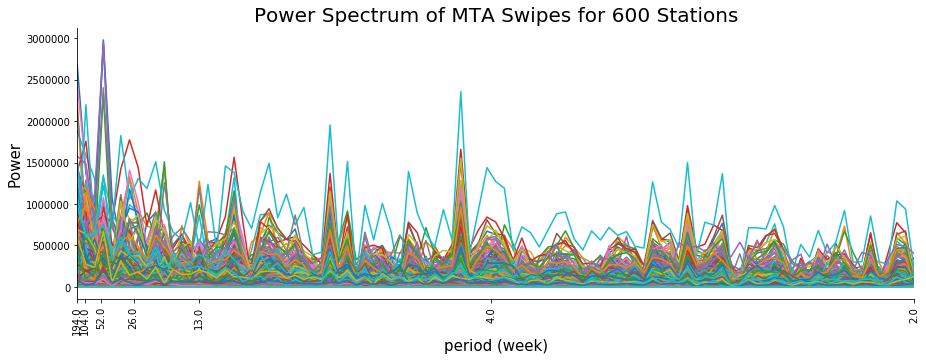

In [122]:
N = len(date)
allperiods = [1/194.0, 1/104.0, 1/52.0, 1/26.0, 1/13.0, 1/4.0, 1/2.0]

fig = pl.figure(figsize=(15,5))
ax = fig.add_subplot(111)

for i in range(len(mtarides_station)):
    f = np.abs(np.fft.rfft(mtarides_station[i]))
    ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), '-')

ax.set_xlim([1/194.0, 1/2.0])
ax.set_xticks(allperiods)
ax.set_xticklabels([ "%s"%(1/f) for f in allperiods], fontsize=10, rotation=90)
ax.set_xlabel("period (week)", fontsize=15)
ax.set_ylabel("Power", fontsize=15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("Power Spectrum of MTA Swipes for 600 Stations", fontsize=20);
pl.show()

## Figure 5: Power Spectrum of MTA Swipes for 600 Stations
The figure shows that there are higher frequency of fluctration around the first few weeks

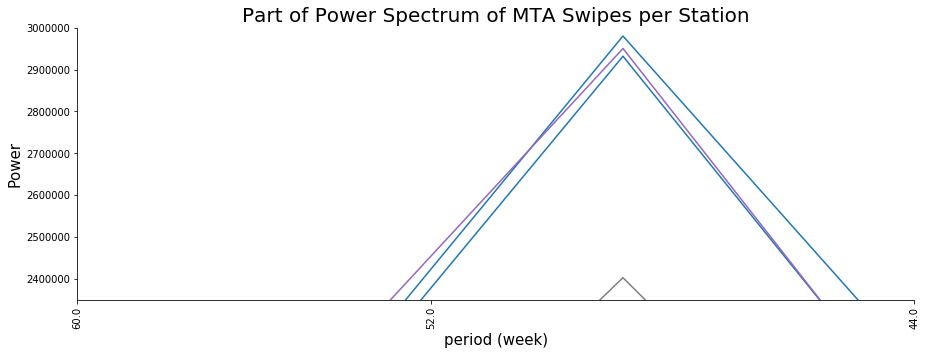

In [123]:
N = len(date)
allperiods = [1/194.0, 1/104.0, 1/52.0, 1/26.0, 1/13.0, 1/4.0, 1/2.0]
station_index = []

fig = pl.figure(figsize=(15,5))
ax = fig.add_subplot(111)

for i in range(len(mtarides_station)):
    f = np.abs(np.fft.rfft(mtarides_station[i]))
    ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), '-')
    if (f[4] > 2350000):
        station_index.append(i)

ax.set_xlim([1/60.0, 1/44.0])
ax.set_xticks([1/60.0, 1/52.0, 1/44.0])
ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], fontsize=10, rotation=90)

ax.set_ylim([2350000, 3000000])
ax.set_xlabel("period (week)", fontsize=15)
ax.set_ylabel("Power", fontsize=15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("Part of Power Spectrum of MTA Swipes per Station", fontsize=20);
pl.show()

## Figure 6. Enlarged  in Power Spectrum of MTA Swipes per Station
This is a cropped part of figure 5. 

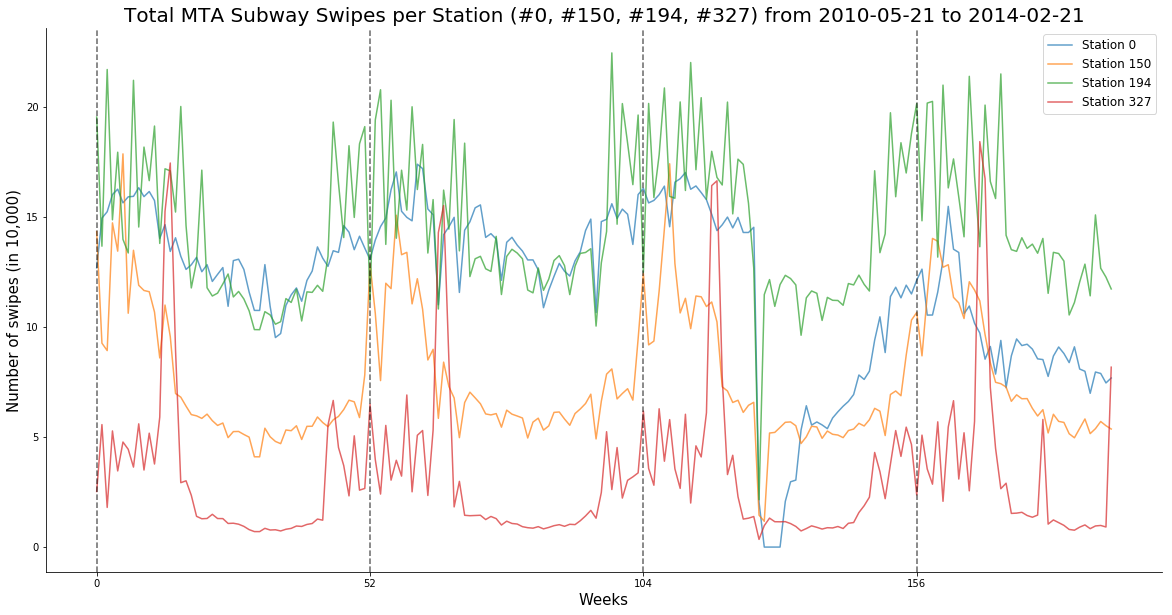

In [124]:
fig = pl.figure(figsize=(20,10))
ax = fig.add_subplot(111)

years = np.arange(0,194,52)

for i in range(len(station_index)):
    ax.plot(mtarides_station[station_index[i]]/1e4, alpha=0.7, label="Station {}".format(station_index[i]))
    
for j in range(len(years)):
    ax.axvline(x=years[j], linestyle='--', color='k', alpha=0.6)

ax.set_xlabel("Weeks", fontsize=15)
ax.set_ylabel("Number of swipes (in 10,000)", fontsize=15)
ax.set_xticks(years)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_title("Total MTA Subway Swipes per Station (#0, #150, #194, #327) from 2010-05-21 to 2014-02-21", fontsize=20);
ax.legend(fontsize=12);
pl.show()

## Figure 7. Total MTA Subway Swipes for Stations #0, #150, #194, and #327 between 2010-05-21 to 2014-02-21
This shows the four identified stations with a high periodcity at 52 weeks (1 year) period. 

## EXTRA CREDIT: Cluster.

### Cluster the time series, i.e. identify groups of time series that look similar among each other. You can use KMeans for example to identify common trends, or PCA (Principle Component Analysis).
 
### Since this is extra credit I will leave it to you to figure out the details, but for KMeans for e.g. if you use the sklearn.cluster package it would look something like:
#### i am flattening the first 2 dimensions of the cube to cluster all light curves for all stations and all types
tots = data.transpose(2,0,1).reshape(data.shape[2], data.shape[1]*data.shape[0]).T
#### removing empty light curves
tots = tots[tots.std(1)>0]
#### with Kmeans you have to choose the number of clusters ahead km =
#### KMeans(n_clusters=10)
#### and standardize the lightcurves before clustering. Notice: standardize, not whiten! If you have done clustering before you may have whitened the data: removed the variance by "column", here you want to remove the variance by "row". We will discuss this in the clustering lecture.
vals = ((tots.T - tots.mean(1))/tots.std(1)).T
#### then you can run:
km.fit(vals)

In [113]:
tots = mtafare.transpose(2,0,1).reshape(mtafare.shape[2], mtafare.shape[1]*mtafare.shape[0]).T
tots.shape

(13800, 194)

In [114]:
tots = tots[tots.std(1) >0]

In [115]:
vals = ((tots.T - tots.mean(1))/tots.std(1)).T
val.shape

(7660, 194)

In [116]:
km.fit(vals)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=324, tol=0.0001, verbose=0)

In [119]:
#to prove n_clusters = 7
n = 3
pca = PCA(n)
Xproj = pca.fit_transform(val)

In [120]:
range_n_clusters = np.arange(2,10)
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(Xproj)
    silhouette_avg = silhouette_score(Xproj, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.456604250042
For n_clusters =3, the average silhouette_score is :0.439317773938
For n_clusters =4, the average silhouette_score is :0.466460745423
For n_clusters =5, the average silhouette_score is :0.443816391332
For n_clusters =6, the average silhouette_score is :0.443971311631
For n_clusters =7, the average silhouette_score is :0.467108359971
For n_clusters =8, the average silhouette_score is :0.466337755715
For n_clusters =9, the average silhouette_score is :0.446887542242


In [121]:
#when n_cluster = 7, silhouette_score is the highest
km = KMeans(n_clusters=7, random_state=324)
cluster_labels = km.fit(Xproj)

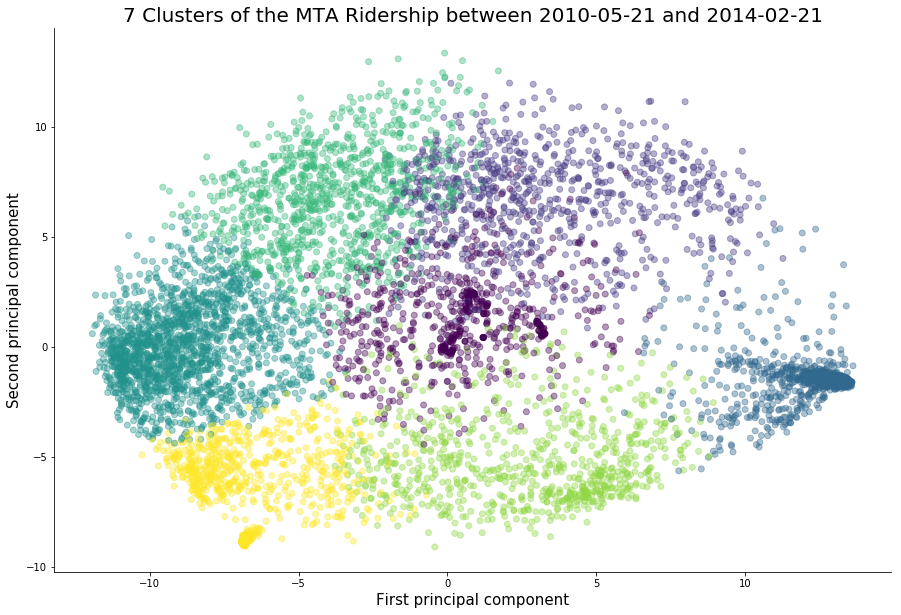

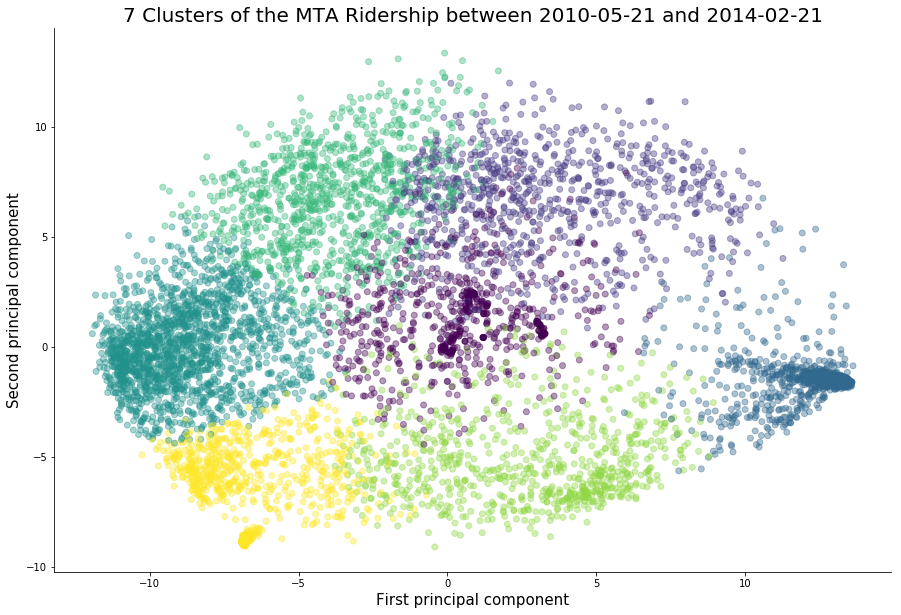

In [108]:
fig = pl.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
# plt.clf()
# Plot the training points
ax.scatter(Xproj[:, 0], Xproj[:, 1], c=cluster_labels.labels_, cmap=plt.cm.viridis, alpha=0.4)
ax.set_xlabel('First principal component', fontsize=15)
ax.set_ylabel('Second principal component', fontsize=15)
ax.set_title('7 Clusters of the MTA Ridership between 2010-05-21 and 2014-02-21', fontsize=20)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);
pl.show()